<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/DS_Chirag_Assignment_TimeSeries_ElectricPowerConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective of this notebook is to analyse historical pattern of powerconsumption and forecast the further utilisation.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:
df=pd.read_csv("/content/powerconsumption.csv")
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [47]:
df.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


### Power consumption Data is captured at every 10 mins right from 1 Jan 2017 to 30 Dec 2017.

### now we will focus only on Power consumption in all 3 zone

In [48]:
df.shape

(52416, 9)

In [49]:
df_pwr=df[["Datetime","PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3"]]
df_pwr.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,27335.69620,17872.34043,18442.40964


In [50]:
df_pwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   PowerConsumption_Zone1  52416 non-null  float64
 2   PowerConsumption_Zone2  52416 non-null  float64
 3   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.6+ MB


In [51]:
## update Datetime column type as datatime

df_pwr['Datetime']=pd.to_datetime(df_pwr['Datetime'],format='%m/%d/%Y %H:%M')

df_pwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   PowerConsumption_Zone1  52416 non-null  float64       
 2   PowerConsumption_Zone2  52416 non-null  float64       
 3   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


<ipython-input-51-6446f5e2f903>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pwr['Datetime']=pd.to_datetime(df_pwr['Datetime'],format='%m/%d/%Y %H:%M')


In [52]:
#Check if any null values
df_pwr.isnull().sum()

Datetime                  0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [53]:
df_pwr.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964


## The data is capture for every10 mins of days, We resample it for daily consumption by taking avg value for the day.
## For that matter, extract date from the Datetime column.



In [54]:
df_pwr['Date']=df_pwr['Datetime'].dt.date
df_pwr.head()

<ipython-input-54-f57a8711233b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pwr['Date']=df_pwr['Datetime'].dt.date


,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,2017-01-01
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,2017-01-01
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,2017-01-01
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,2017-01-01
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,2017-01-01


In [55]:
df_daily=df_pwr.groupby(df_pwr['Date']).mean()
df_daily.head()

<ipython-input-55-2f0cbc9edd6d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily=df_pwr.groupby(df_pwr['Date']).mean()


,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Date,,,
2017-01-01,28465.232067,17737.791287,17868.795181
2017-01-02,28869.493671,19557.725431,17820.763053
2017-01-03,30562.447257,20057.269504,17620.803213
2017-01-04,30689.831224,20102.077001,17673.694779
2017-01-05,30802.911393,20033.941237,17664.176707


### So here Date column became index of this new dataframe, df_daily

### Now we have day wise avg  Powerconsumption for  each zone.
### lets set Date col as index and plot the graph

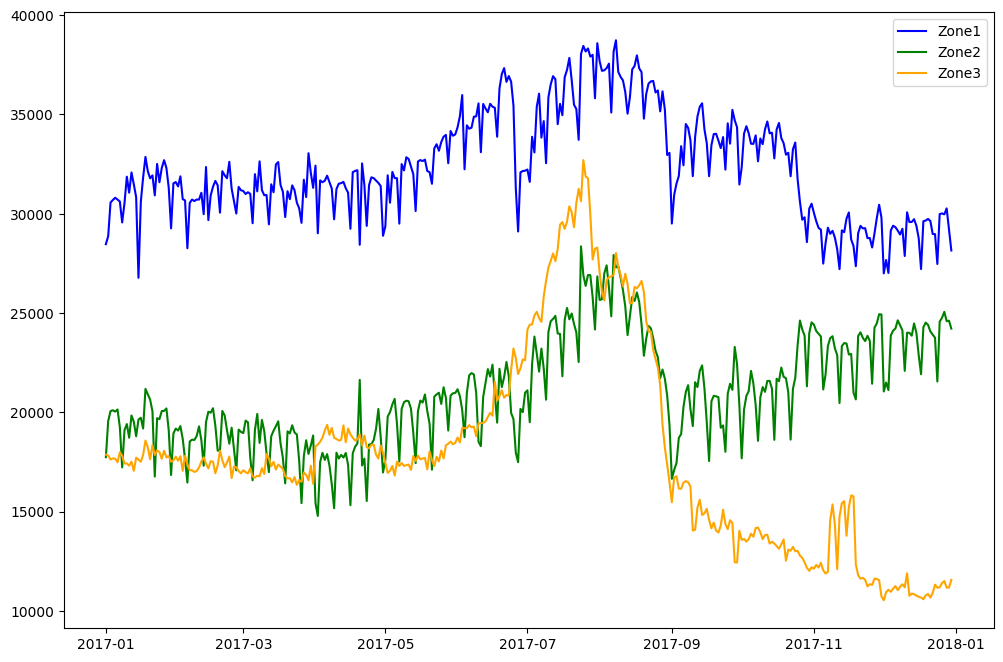

In [56]:
## Lets plot it

plt.figure(figsize=(12,8))
plt.plot(df_daily['PowerConsumption_Zone1'],label='Zone1',color='blue')
plt.plot(df_daily['PowerConsumption_Zone2'],label='Zone2',color='green')
plt.plot(df_daily['PowerConsumption_Zone3'],label='Zone3',color='orange')
plt.legend()


## We see the each has trend.  Lets do log transormation to normalise and try to make it stationery

In [57]:
## Stationarity check function

def check_stationarity(ts):
  rolmean=ts.rolling(7).mean()
  rolstd=ts.rolling(7).std()
  plt.figure(figsize=(8, 3))
  plt.xlabel('months')
  plt.ylabel('power Consumption')
  plt.plot(ts)
  plt.plot(rolmean,label='Rolling Mean (7 Days)', color='orange')
  plt.plot(rolstd,label='Rolling Std (7 Days)', color='green')
  plt.legend()  #based on label provided in plt.plot

  # Statistical check
  # ADF(dicky fullar test)
  from statsmodels.tsa.stattools import adfuller
  adft=adfuller(ts)
  print(pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"]))

### Here we have 3 diff time serieses, accordingly we must be checking stationarity and building model separately for each zone consumption

test stats      -1.559147
p-value          0.504076
lag             14.000000
data points    349.000000
dtype: float64


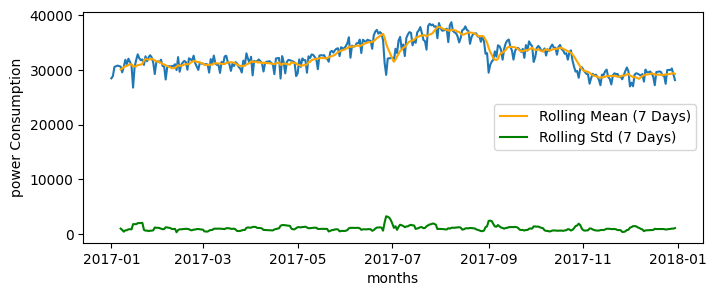

In [58]:
check_stationarity(df_daily['PowerConsumption_Zone1'])

## Mean is varying. Pvalue > 0.05   Series not stationery

test stats      -1.525507
p-value          0.520858
lag             15.000000
data points    348.000000
dtype: float64


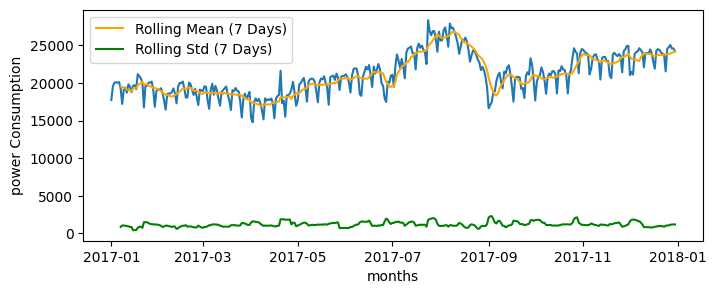

In [59]:
check_stationarity(df_daily['PowerConsumption_Zone2'])

## Mean is varying. Pvalue > 0.05   Series not stationery

test stats      -1.499794
p-value          0.533613
lag             16.000000
data points    347.000000
dtype: float64


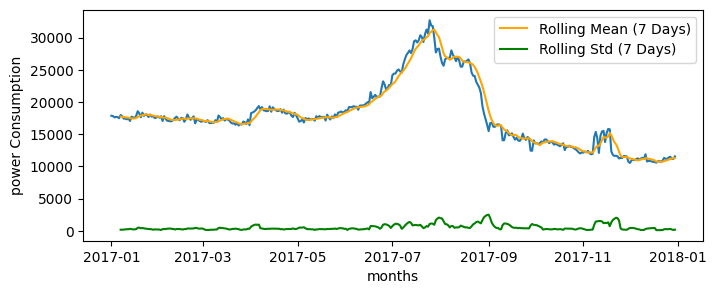

In [60]:
check_stationarity(df_daily['PowerConsumption_Zone3'])

## Mean is varying. Pvalue > 0.05   Series not stationery

## LOG Transformation

In [64]:
df_daily_Z1_log1=np.log(df_daily['PowerConsumption_Zone1'])
df_daily_Z2_log1=np.log(df_daily['PowerConsumption_Zone2'])
df_daily_Z3_log1=np.log(df_daily['PowerConsumption_Zone3'])

In [65]:
df_daily.head()

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Date,,,
2017-01-01,28465.232067,17737.791287,17868.795181
2017-01-02,28869.493671,19557.725431,17820.763053
2017-01-03,30562.447257,20057.269504,17620.803213
2017-01-04,30689.831224,20102.077001,17673.694779
2017-01-05,30802.911393,20033.941237,17664.176707


test stats      -1.527227
p-value          0.520002
lag             14.000000
data points    349.000000
dtype: float64


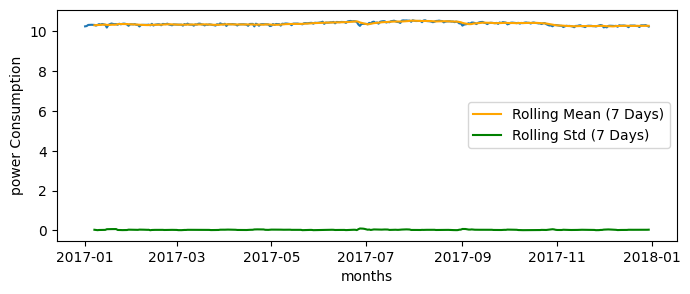

In [66]:
check_stationarity(df_daily_Z1_log1)

# p value > 0.05 but mean looks constant. Let try to build ARIMA with it.

test stats      -1.318215
p-value          0.620798
lag             17.000000
data points    346.000000
dtype: float64


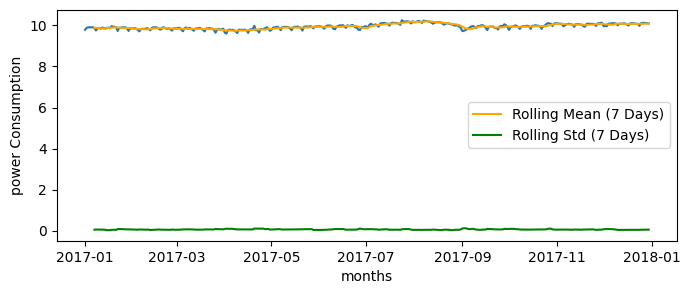

In [67]:
check_stationarity(df_daily_Z2_log1)
# p value > 0.05 but mean looks constant. Let try to build ARIMA with it.

test stats      -1.040698
p-value          0.738133
lag             14.000000
data points    349.000000
dtype: float64


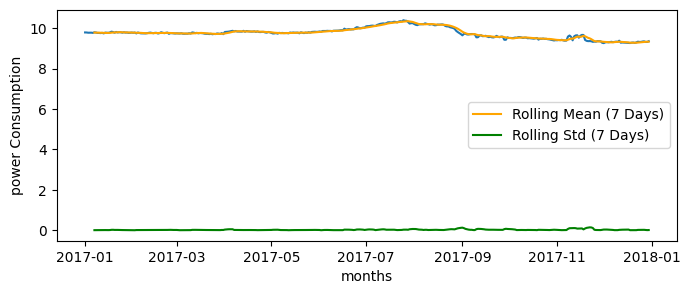

In [68]:
check_stationarity(df_daily_Z3_log1)
# p value > 0.05 but mean looks constant. Let try to build ARIMA with it.

In [69]:
len(df_pwr),len(df_daily_Z1_log1),len(df_daily_Z2_log1),len(df_daily_Z3_log1)

(52416, 364, 364, 364)

In [70]:
split_point=len(df_daily_Z1_log1)-64
split_point

300

## SPLIT series in train and test.


In [71]:
trainZ1=df_daily_Z1_log1[:split_point]
testZ1=df_daily_Z1_log1[split_point:]

trainZ2=df_daily_Z2_log1[:split_point]
testZ2=df_daily_Z2_log1[split_point:]

trainZ3=df_daily_Z3_log1[:split_point]
testZ3=df_daily_Z3_log1[split_point:]

## Here onwards we need to build ARIMA for each feature seprately and keep validating output. Hence creating Validation function

In [72]:
def validate_prediction(pred_set,test_set):
  # Plot graph of predicted data and test data. see if both inline
  plt.figure(figsize=(8, 4))
  plt.plot(test_set,label='Test data',color='blue')
  plt.plot(pred_set,label='Predicted data',color='orange')
  plt.legend()

  # RMSE Test. Expected Err value is close to Zero.
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rmse=sqrt(mean_squared_error(pred_set,test_set))
  print("Root mean square error is %0.4f" % rmse)

## Using Auto-Arima, let find the order

In [73]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.4 MB/s eta 0:00:00


## FIND ORDER for Zone1 Consumption

In [74]:
#### Find Order of ARIMA for this series

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


stepwise_fit=auto_arima(df_daily_Z1_log1,trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1357.276, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1285.714, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1328.125, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1345.845, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1287.713, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1358.126, Time=1.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1354.801, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1359.613, Time=1.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1358.691, Time=2.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1329.259, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1361.602, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1347.845, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1330.125, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1360.678, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 683.801
Date:                Tue, 27 Feb 2024   AIC                          -1361.602
Time:                        19:33:43   BIC                          -1349.919
Sample:                    01-01-2017   HQIC                         -1356.958
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3290      0.067      4.902      0.000       0.197       0.461
ma.L1         -0.7941      0.052    -15.414      0.000      -0.895      -0.693
sigma2         0.0014    7.6e-05     17.767      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                88.42
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.84
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## build Model for Zone1

In [75]:
import statsmodels.api as sm

In [76]:
## TRAIN MODEL

model_Z1=sm.tsa.arima.ARIMA(trainZ1,order=(1,1,1))
model_Z1=model_Z1.fit()
model_Z1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   No. Observations:                  300
Model:                     ARIMA(1, 1, 1)   Log Likelihood                 556.231
Date:                    Tue, 27 Feb 2024   AIC                          -1106.463
Time:                            19:33:51   BIC                          -1095.361
Sample:                        01-01-2017   HQIC                         -1102.020
                             - 10-27-2017                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3393      0.068      5.007      0.000       0.206       0.472
ma.L1         -0.8165      0.052    -15.829      0.000      -0.918      -0.715
sigma2         0.0014   8.77e-05     16.136      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                90.16
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.92
Prob(H) (two-sided):                  0.92   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
## TEST

Start=split_point
End=len(df_daily_Z1_log1)-1

pred_Z1=model_Z1.predict(start=Start,end=End,typ='levels')
print(pred_Z1)

2017-10-28    10.342765
2017-10-29    10.357679
2017-10-30    10.362739
2017-10-31    10.364456
2017-11-01    10.365039
                ...    
2017-12-26    10.365338
2017-12-27    10.365338
2017-12-28    10.365338
2017-12-29    10.365338
2017-12-30    10.365338
Freq: D, Name: predicted_mean, Length: 64, dtype: float64


In [78]:
len(pred_Z1), len(testZ1),type(pred_Z1)

(64, 64, pandas.core.series.Series)

In [79]:
## Reversal of log scaled data
pred_Z1=np.exp(pred_Z1)
test_Z1=np.exp(testZ1)

In [80]:
pred_Z1.head(3)

2017-10-28    31031.711088
2017-10-29    31497.988051
2017-10-30    31657.782286
Freq: D, Name: predicted_mean, dtype: float64

In [81]:
test_Z1.head(3)

Date
2017-10-28    29818.730854
2017-10-29    28570.196937
2017-10-30    30251.466083
Name: PowerConsumption_Zone1, dtype: float64

Root mean square error is 2804.5665


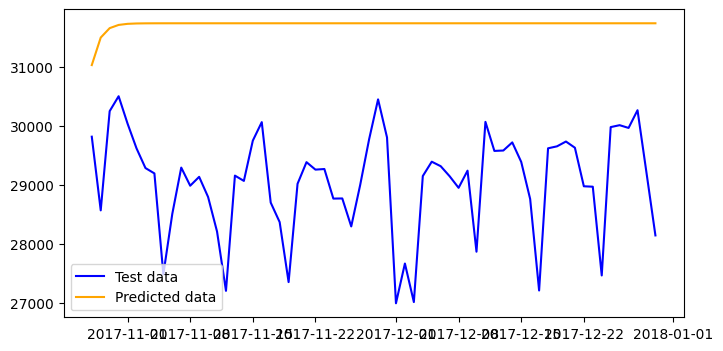

In [82]:
validate_prediction(pred_Z1,test_Z1)